In [18]:
#import
import pandas
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import matplotlib.pyplot as plt

pandas.options.mode.chained_assignment = None

In [44]:
# Grab data
city_temps = pandas.read_csv("./data/city_temps_cleaned.csv")
arhus = city_temps[city_temps.City == "Århus"]
dates = arhus[["dt", "AverageTemperature"]]
dates["dt"] = pandas.to_datetime(dates["dt"], format="%Y-%m-%d")
dates.set_index("dt", inplace=True)

In [45]:
model = sm.tsa.statespace.SARIMAX(dates, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()

c:\Users\kevin\Desktop\climate-change-project\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\kevin\Desktop\climate-change-project\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


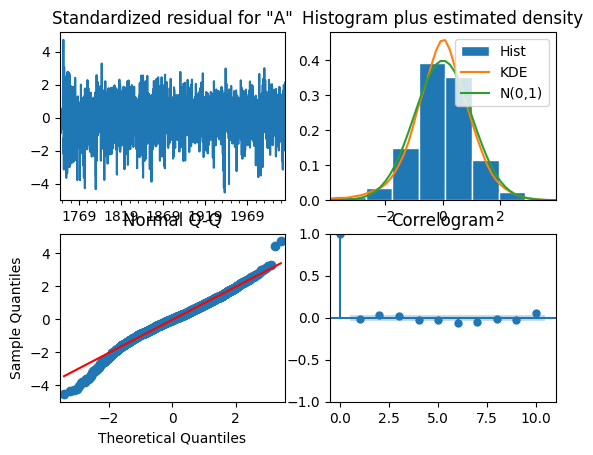

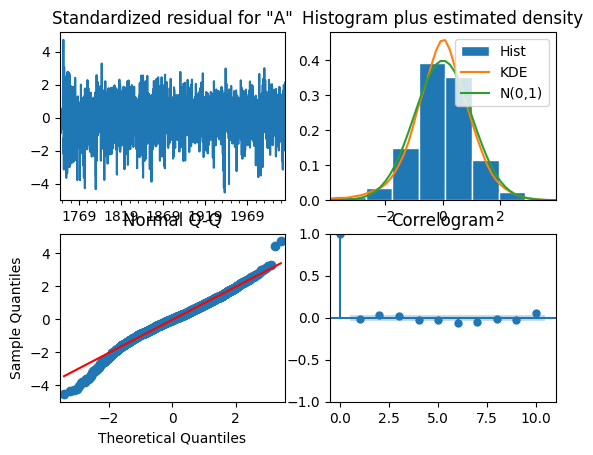

In [46]:
result.plot_diagnostics()

In [48]:

forecast = result.get_forecast(steps=48) # Predict next four years
forecast.summary_frame()


AverageTemperature,mean,mean_se,mean_ci_lower,mean_ci_upper
2013-10-01,10.930482,1.684420,7.629079,14.231885
2013-11-01,6.190363,1.877803,2.509937,9.870789
2013-12-01,2.147526,1.924060,-1.623562,5.918614
2014-01-01,1.227960,1.936827,-2.568151,5.024072
2014-02-01,1.072544,1.940998,-2.731743,4.876831
2014-03-01,3.074108,1.942713,-0.733540,6.881756
2014-04-01,7.242807,1.943630,3.433361,11.052253
2014-05-01,12.279055,1.944253,8.468391,16.089720
2014-06-01,15.491776,1.944753,11.680130,19.303421
2014-07-01,17.853611,1.945200,14.041089,21.666132


Text(0.5, 1.0, 'Temperature Forcast with SARIMA')

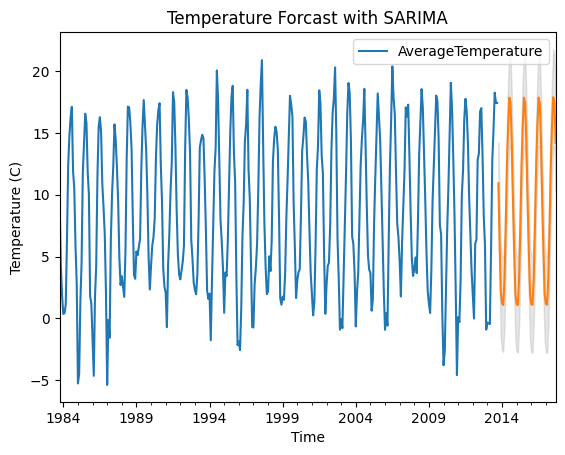

In [53]:
# only want last few years of data
last_few_years = dates.tail(360)

ax1 = last_few_years.plot()
forecast.predicted_mean.plot(ax=ax1, label="Forecast")

ci = forecast.conf_int()
ax1.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color="gray", alpha=0.2)

ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (C)")
ax1.set_title("Temperature Forcast with SARIMA")